In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r India_2018

In [5]:
India_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
8,8,KK Ahmed (INDIA),6,2,1,4,3,4.00,12,33.33,...,264,11,3/13,24.00,5.07,28.3,0,0,1,0
42,42,JJ Bumrah (INDIA),13,1,0,0,0,0.00,3,0.00,...,366,22,4/35,16.63,3.62,27.5,1,0,4,0
48,48,YS Chahal (INDIA),17,2,0,15,12,7.50,17,88.23,...,754,29,5/22,26.00,4.82,32.3,1,1,3,0
49,49,DL Chahar (INDIA),1,1,0,12,12,12.00,14,85.71,...,37,1,1/37,37.00,9.25,24.0,0,0,0,0
81,81,S Dhawan (INDIA),19,19,1,897,127,49.83,877,102.28,...,-,-,-,-,-,-,-,-,10,0
82,82,MS Dhoni (INDIA),20,13,2,275,42*,25.00,385,71.42,...,-,-,-,-,-,-,-,-,17,10
126,126,SS Iyer (INDIA),3,2,0,48,30,24.00,58,82.75,...,-,-,-,-,-,-,-,-,2,0
127,127,RA Jadeja (INDIA),8,4,1,68,25,22.66,85,80.00,...,344,14,4/29,24.57,4.59,32.0,2,0,0,0
128,128,KM Jadhav (INDIA),11,5,3,87,28*,43.50,90,96.66,...,169,6,3/23,28.16,4.12,41.0,0,0,5,0
140,140,KD Karthik (INDIA),7,6,2,167,44,41.75,227,73.56,...,-,-,-,-,-,-,-,-,2,0


In [6]:
India_2018=India_2018.reset_index()

In [7]:
India_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,8,8,KK Ahmed (INDIA),6,2,1,4,3,4.00,12,...,264,11,3/13,24.00,5.07,28.3,0,0,1,0
1,42,42,JJ Bumrah (INDIA),13,1,0,0,0,0.00,3,...,366,22,4/35,16.63,3.62,27.5,1,0,4,0
2,48,48,YS Chahal (INDIA),17,2,0,15,12,7.50,17,...,754,29,5/22,26.00,4.82,32.3,1,1,3,0
3,49,49,DL Chahar (INDIA),1,1,0,12,12,12.00,14,...,37,1,1/37,37.00,9.25,24.0,0,0,0,0
4,81,81,S Dhawan (INDIA),19,19,1,897,127,49.83,877,...,-,-,-,-,-,-,-,-,10,0
5,82,82,MS Dhoni (INDIA),20,13,2,275,42*,25.00,385,...,-,-,-,-,-,-,-,-,17,10
6,126,126,SS Iyer (INDIA),3,2,0,48,30,24.00,58,...,-,-,-,-,-,-,-,-,2,0
7,127,127,RA Jadeja (INDIA),8,4,1,68,25,22.66,85,...,344,14,4/29,24.57,4.59,32.0,2,0,0,0
8,128,128,KM Jadhav (INDIA),11,5,3,87,28*,43.50,90,...,169,6,3/23,28.16,4.12,41.0,0,0,5,0
9,140,140,KD Karthik (INDIA),7,6,2,167,44,41.75,227,...,-,-,-,-,-,-,-,-,2,0


In [8]:
India_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
India_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,KK Ahmed (INDIA),6,2,1,4,3,4.00,12,33.33,0,...,264,11,3/13,24.00,5.07,28.3,0,0,1,0
1,JJ Bumrah (INDIA),13,1,0,0,0,0.00,3,0.00,0,...,366,22,4/35,16.63,3.62,27.5,1,0,4,0
2,YS Chahal (INDIA),17,2,0,15,12,7.50,17,88.23,0,...,754,29,5/22,26.00,4.82,32.3,1,1,3,0
3,DL Chahar (INDIA),1,1,0,12,12,12.00,14,85.71,0,...,37,1,1/37,37.00,9.25,24.0,0,0,0,0
4,S Dhawan (INDIA),19,19,1,897,127,49.83,877,102.28,3,...,-,-,-,-,-,-,-,-,10,0
5,MS Dhoni (INDIA),20,13,2,275,42*,25.00,385,71.42,0,...,-,-,-,-,-,-,-,-,17,10
6,SS Iyer (INDIA),3,2,0,48,30,24.00,58,82.75,0,...,-,-,-,-,-,-,-,-,2,0
7,RA Jadeja (INDIA),8,4,1,68,25,22.66,85,80.00,0,...,344,14,4/29,24.57,4.59,32.0,2,0,0,0
8,KM Jadhav (INDIA),11,5,3,87,28*,43.50,90,96.66,0,...,169,6,3/23,28.16,4.12,41.0,0,0,5,0
9,KD Karthik (INDIA),7,6,2,167,44,41.75,227,73.56,0,...,-,-,-,-,-,-,-,-,2,0


In [10]:
India_2018_players =India_2018.copy()

In [11]:
India_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
India_2018_players.HS=India_2018_players.HS.str.extract('(\d+)')
India_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
India_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,2,1,4,3,4.00,12,33.33,0,0,...,264,11,3/13,24.00,5.07,28.3,0,0,1,0
1,13,1,0,0,0,0.00,3,0.00,0,0,...,366,22,4/35,16.63,3.62,27.5,1,0,4,0
2,17,2,0,15,12,7.50,17,88.23,0,0,...,754,29,5/22,26.00,4.82,32.3,1,1,3,0
3,1,1,0,12,12,12.00,14,85.71,0,0,...,37,1,1/37,37.00,9.25,24.0,0,0,0,0
4,19,19,1,897,127,49.83,877,102.28,3,2,...,-,-,-,-,-,-,-,-,10,0
5,20,13,2,275,42,25.00,385,71.42,0,0,...,-,-,-,-,-,-,-,-,17,10
6,3,2,0,48,30,24.00,58,82.75,0,0,...,-,-,-,-,-,-,-,-,2,0
7,8,4,1,68,25,22.66,85,80.00,0,0,...,344,14,4/29,24.57,4.59,32.0,2,0,0,0
8,11,5,3,87,28,43.50,90,96.66,0,0,...,169,6,3/23,28.16,4.12,41.0,0,0,5,0
9,7,6,2,167,44,41.75,227,73.56,0,0,...,-,-,-,-,-,-,-,-,2,0


In [14]:
India_2018_players.replace("-",0,inplace=True)

In [15]:
India_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

India_2018_players_scaled = pd.DataFrame(scaler.fit_transform(India_2018_players),columns=India_2018_players.columns)
India_2018_players_scaled.shape
India_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.442719,-0.651069,-0.258985,-0.560653,-0.824380,-0.856283,-0.589550,-1.093930,-0.381000,-0.507565,...,0.378148,0.368647,0.439945,0.269219,0.622490,0.397221,-0.465633,-0.294884,-0.632830,-0.204124
1,0.664078,-0.838158,-0.847587,-0.572754,-0.888318,-0.996621,-0.617209,-2.031860,-0.381000,-0.507565,...,3.529384,0.805270,1.456624,-0.053616,0.141969,0.362948,1.197342,-0.294884,0.097358,-0.204124
2,1.296534,-0.651069,-0.847587,-0.527375,-0.632564,-0.733488,-0.574185,0.450994,-0.381000,-0.507565,...,0.828325,2.466151,2.103602,0.356827,0.539642,0.568585,1.197342,3.391165,-0.146038,-0.204124
3,-1.233288,-0.838158,-0.847587,-0.536451,-0.632564,-0.575608,-0.583404,0.380080,-0.381000,-0.507565,...,-0.522205,-0.603054,-0.484309,0.838670,2.007716,0.213005,-0.465633,-0.294884,-0.876226,-0.204124
4,1.612762,2.529441,-0.258985,2.140962,1.818410,0.751634,2.068712,0.846371,1.524002,1.444607,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,1.557736,-0.204124


In [17]:
India_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,25.000000,2.500000e+01,2.500000e+01,2.500000e+01
mean,-8.881784e-17,-8.881784e-17,8.881784e-18,3.996803e-17,-2.220446e-17,1.065814e-16,-1.332268e-17,-2.131628e-16,2.220446e-17,-8.881784e-18,...,1.065814e-16,1.554312e-17,-6.661338e-17,0.000000,-2.486900e-16,6.217249e-17,0.000000,-5.329071e-17,2.664535e-17,-3.330669e-17
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,...,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621e+00,1.020621e+00,1.020621,1.020621e+00,1.020621e+00,1.020621e+00
min,-1.233288e+00,-8.381581e-01,-8.475869e-01,-5.727545e-01,-8.883183e-01,-9.966207e-01,-6.233549e-01,-2.031860e+00,-3.810004e-01,-5.075647e-01,...,-5.222047e-01,-7.614367e-01,-5.767344e-01,-0.782075,-1.057676e+00,-8.151768e-01,-0.465633,-2.948839e-01,-8.762263e-01,-2.041241e-01
25%,-9.170605e-01,-6.510692e-01,-8.475869e-01,-5.364506e-01,-6.325645e-01,-7.159457e-01,-5.803310e-01,-3.940711e-01,-3.810004e-01,-5.075647e-01,...,-5.222047e-01,-7.614367e-01,-5.767344e-01,-0.782075,-1.057676e+00,-8.151768e-01,-0.465633,-2.948839e-01,-6.328301e-01,-2.041241e-01
50%,-2.846050e-01,-4.639804e-01,-2.589849e-01,-4.275389e-01,-3.768106e-01,-2.016088e-01,-4.205279e-01,2.193962e-01,-3.810004e-01,-5.075647e-01,...,-5.222047e-01,-5.816507e-01,-5.767344e-01,-0.782075,3.076659e-01,-8.151768e-01,-0.465633,-2.948839e-01,-3.894339e-01,-2.041241e-01
75%,8.221922e-01,2.843751e-01,3.296171e-01,-1.492090e-01,9.207138e-02,3.716698e-01,-6.711729e-02,5.216273e-01,-3.810004e-01,-5.075647e-01,...,-7.202824e-02,4.157338e-01,-2.218209e-02,0.451443,7.815589e-01,5.557322e-01,-0.465633,-2.948839e-01,9.735848e-02,-2.041241e-01
max,1.770875e+00,2.529441e+00,2.684025e+00,3.063686e+00,2.564358e+00,3.688897e+00,2.975287e+00,1.837486e+00,3.429003e+00,2.420693e+00,...,3.529384e+00,2.663059e+00,3.582408e+00,2.687196,2.007716e+00,2.852005e+00,2.860317,3.391165e+00,3.261509e+00,4.898979e+00


In [18]:
X =  India_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[-4.42718872e-01, -6.51069220e-01, -2.58984885e-01,
        -5.60653170e-01, -8.24379830e-01, -8.56283207e-01,
        -5.89550391e-01, -1.09393032e+00, -3.81000381e-01,
        -5.07564726e-01, -6.85994341e-01, -4.94596437e-01,
        -4.33776573e-01, -1.78373106e+00, -4.42718872e-01,
         2.72361245e-01,  3.33136244e-01,  3.78148263e-01,
         3.68647003e-01,  4.39944853e-01,  2.69218970e-01,
         6.22489930e-01,  3.97220880e-01, -4.65633074e-01,
        -2.94883912e-01, -6.32830099e-01, -2.04124145e-01],
       [ 6.64078309e-01, -8.38158076e-01, -8.47586897e-01,
        -5.72754469e-01, -8.88318286e-01, -9.96620693e-01,
        -6.17208614e-01, -2.03185985e+00, -3.81000381e-01,
        -5.07564726e-01,  1.45773797e+00, -4.94596437e-01,
        -4.33776573e-01, -1.41366238e+00,  6.64078309e-01,
         1.49449504e+00,  1.31497313e+00,  3.52938379e+00,
         8.05270253e-01,  1.45662413e+00, -5.36160135e-02,
         1.41969062e-01,  3.62948155e-01,  1.19734219e+

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(India_2018_players_scaled))

False

In [23]:
India_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.442719,-0.651069,-0.258985,-0.560653,-0.824380,-0.856283,-0.589550,-1.093930,-0.381000,-0.507565,...,0.378148,0.368647,0.439945,0.269219,0.622490,0.397221,-0.465633,-0.294884,-0.632830,-0.204124
1,0.664078,-0.838158,-0.847587,-0.572754,-0.888318,-0.996621,-0.617209,-2.031860,-0.381000,-0.507565,...,3.529384,0.805270,1.456624,-0.053616,0.141969,0.362948,1.197342,-0.294884,0.097358,-0.204124
2,1.296534,-0.651069,-0.847587,-0.527375,-0.632564,-0.733488,-0.574185,0.450994,-0.381000,-0.507565,...,0.828325,2.466151,2.103602,0.356827,0.539642,0.568585,1.197342,3.391165,-0.146038,-0.204124
3,-1.233288,-0.838158,-0.847587,-0.536451,-0.632564,-0.575608,-0.583404,0.380080,-0.381000,-0.507565,...,-0.522205,-0.603054,-0.484309,0.838670,2.007716,0.213005,-0.465633,-0.294884,-0.876226,-0.204124
4,1.612762,2.529441,-0.258985,2.140962,1.818410,0.751634,2.068712,0.846371,1.524002,1.444607,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,1.557736,-0.204124
5,1.770875,1.406908,0.329617,0.259210,0.006820,-0.119511,0.556729,-0.022051,-0.381000,-0.507565,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,3.261509,4.898979
6,-0.917061,-0.651069,-0.847587,-0.427539,-0.248934,-0.154596,-0.448186,0.296783,-0.381000,-0.507565,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,-0.389434,-0.204124
7,-0.126491,-0.276892,-0.258985,-0.367032,-0.355498,-0.201609,-0.365211,0.219396,-0.381000,-0.507565,...,0.828325,0.711097,0.717221,0.294187,0.463421,0.555732,2.860317,-0.294884,-0.876226,-0.204124
8,0.347851,-0.089803,0.918219,-0.309551,-0.291559,0.529549,-0.349846,0.688220,-0.381000,-0.507565,...,-0.072028,-0.038012,-0.022182,0.451443,0.307666,0.941300,-0.465633,-0.294884,0.340755,-0.204124
9,-0.284605,0.097286,0.329617,-0.067525,0.049446,0.468152,0.071174,0.038170,-0.381000,-0.507565,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,-0.389434,-0.204124


In [24]:
np.all(np.isfinite(India_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


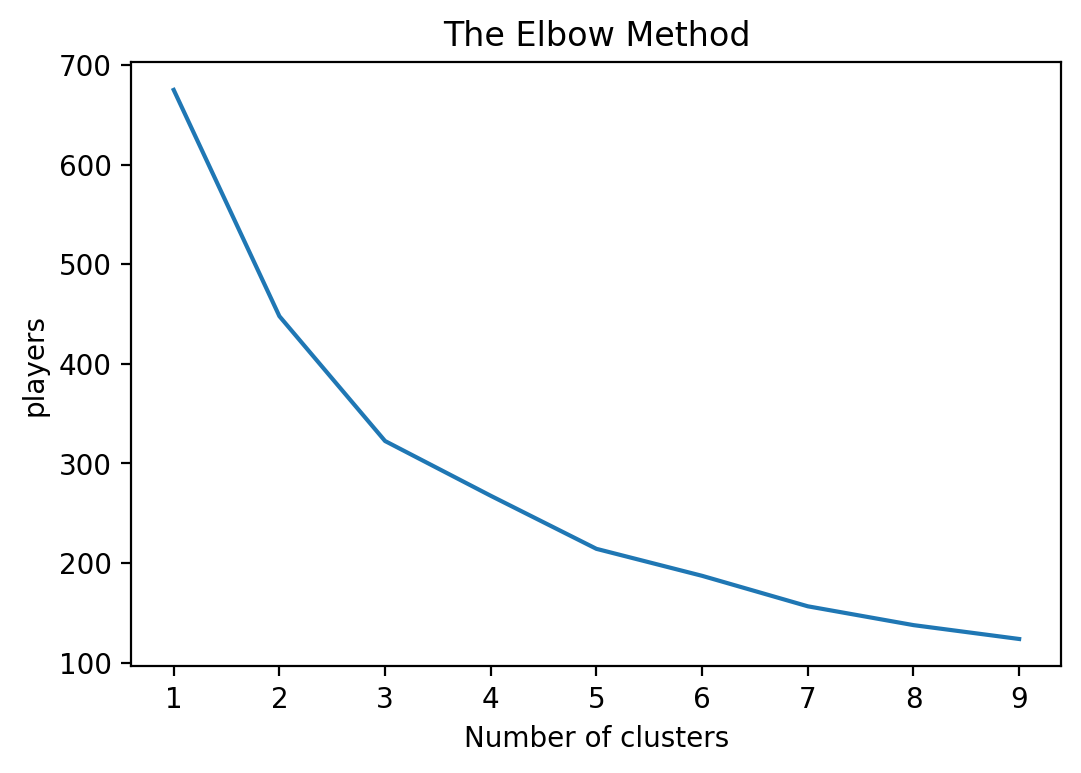

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[-0.69570109, -0.51387073, -0.41594542, -0.42874901, -0.35123525,
        -0.33504639, -0.44572763, -0.0753683 , -0.38100038, -0.37741992,
         0.0285831 , -0.40932119, -0.34340645,  0.24729296, -0.69570109,
        -0.3212466 , -0.3359974 , -0.40215768, -0.29170999, -0.36107519,
         0.13071093,  0.19742227,  0.05877772, -0.35476806, -0.29488391,
        -0.42188673, -0.20412415],
       [ 1.23328829,  1.78108591,  1.03593954,  1.72407203,  1.63085689,
         1.37473198,  1.76754484,  0.59693179,  1.52400152,  1.6398245 ,
         0.17149859,  1.65860357,  1.43934954,  0.01001362,  1.23328829,
        -0.7402639 , -0.71914997, -0.52220474, -0.7614367 , -0.57673443,
        -0.78207541, -1.05767614, -0.81517676, -0.46563307, -0.29488391,
         1.60641487,  0.81649658],
       [ 0.85381497, -0.23947374,  0.21189672, -0.43782499, -0.57715113,
        -0.3695928 , -0.43036195, -0.37082689, -0.38100038, -0.50756473,
        -0.25724788, -0.43064   , -0.40913018, -0.7518

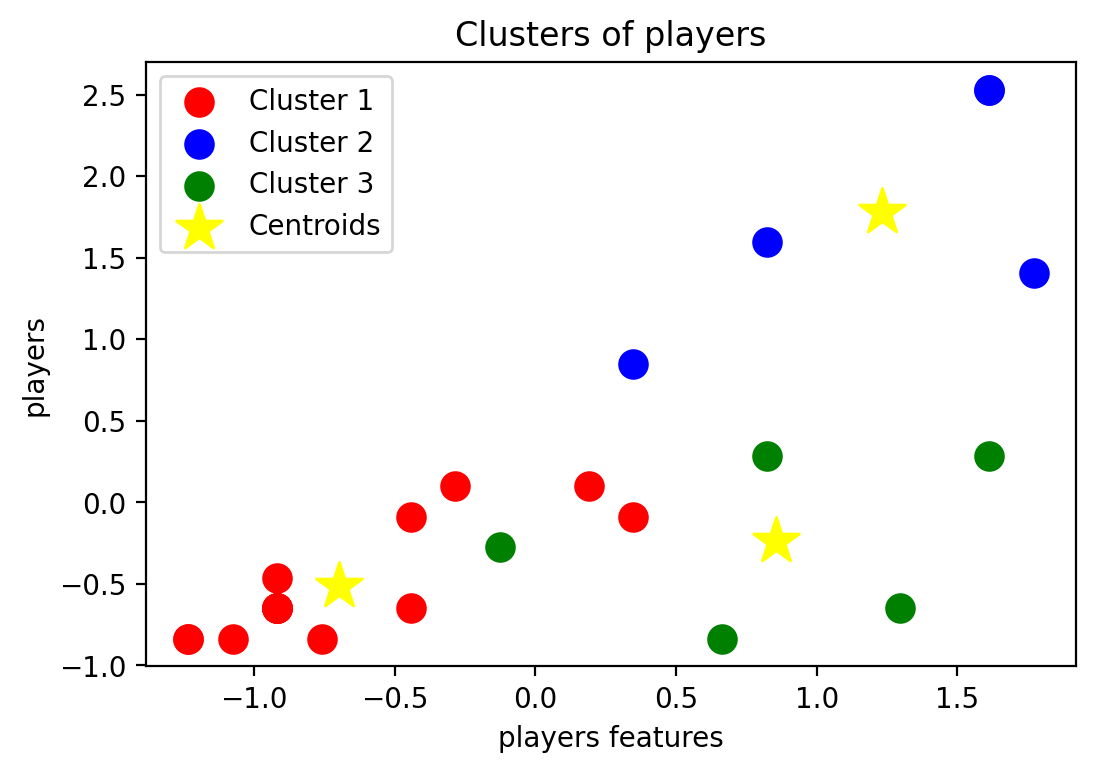

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
India_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,KK Ahmed (INDIA),6,2,1,4,3,4.00,12,33.33,0,...,264,11,3/13,24.00,5.07,28.3,0,0,1,0
1,JJ Bumrah (INDIA),13,1,0,0,0,0.00,3,0.00,0,...,366,22,4/35,16.63,3.62,27.5,1,0,4,0
2,YS Chahal (INDIA),17,2,0,15,12,7.50,17,88.23,0,...,754,29,5/22,26.00,4.82,32.3,1,1,3,0
3,DL Chahar (INDIA),1,1,0,12,12,12.00,14,85.71,0,...,37,1,1/37,37.00,9.25,24.0,0,0,0,0
4,S Dhawan (INDIA),19,19,1,897,127,49.83,877,102.28,3,...,-,-,-,-,-,-,-,-,10,0
5,MS Dhoni (INDIA),20,13,2,275,42*,25.00,385,71.42,0,...,-,-,-,-,-,-,-,-,17,10
6,SS Iyer (INDIA),3,2,0,48,30,24.00,58,82.75,0,...,-,-,-,-,-,-,-,-,2,0
7,RA Jadeja (INDIA),8,4,1,68,25,22.66,85,80.00,0,...,344,14,4/29,24.57,4.59,32.0,2,0,0,0
8,KM Jadhav (INDIA),11,5,3,87,28*,43.50,90,96.66,0,...,169,6,3/23,28.16,4.12,41.0,0,0,5,0
9,KD Karthik (INDIA),7,6,2,167,44,41.75,227,73.56,0,...,-,-,-,-,-,-,-,-,2,0


In [31]:
India_2018["cluster"] = y_kmeans

In [32]:
India_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,KK Ahmed (INDIA),6,2,1,4,3,4.00,12,33.33,0,...,11,3/13,24.00,5.07,28.3,0,0,1,0,0
1,JJ Bumrah (INDIA),13,1,0,0,0,0.00,3,0.00,0,...,22,4/35,16.63,3.62,27.5,1,0,4,0,2
2,YS Chahal (INDIA),17,2,0,15,12,7.50,17,88.23,0,...,29,5/22,26.00,4.82,32.3,1,1,3,0,2
3,DL Chahar (INDIA),1,1,0,12,12,12.00,14,85.71,0,...,1,1/37,37.00,9.25,24.0,0,0,0,0,0
4,S Dhawan (INDIA),19,19,1,897,127,49.83,877,102.28,3,...,-,-,-,-,-,-,-,10,0,1
5,MS Dhoni (INDIA),20,13,2,275,42*,25.00,385,71.42,0,...,-,-,-,-,-,-,-,17,10,1
6,SS Iyer (INDIA),3,2,0,48,30,24.00,58,82.75,0,...,-,-,-,-,-,-,-,2,0,0
7,RA Jadeja (INDIA),8,4,1,68,25,22.66,85,80.00,0,...,14,4/29,24.57,4.59,32.0,2,0,0,0,2
8,KM Jadhav (INDIA),11,5,3,87,28*,43.50,90,96.66,0,...,6,3/23,28.16,4.12,41.0,0,0,5,0,0
9,KD Karthik (INDIA),7,6,2,167,44,41.75,227,73.56,0,...,-,-,-,-,-,-,-,2,0,0


In [33]:
India_2018['cluster'].value_counts()

0    15
1     5
2     5
Name: cluster, dtype: int64

In [34]:
India_Cluster_2018 = np.array([15 ,5,5])

In [35]:
India_Cluster_2018

array([15,  5,  5])

In [36]:
%store India_Cluster_2018

Stored 'India_Cluster_2018' (ndarray)


In [37]:
India_2018_players_scaled.insert(0, 'Player', India_2018.Player)

In [38]:
India_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,KK Ahmed (INDIA),-0.442719,-0.651069,-0.258985,-0.560653,-0.824380,-0.856283,-0.589550,-1.093930,-0.381000,...,0.378148,0.368647,0.439945,0.269219,0.622490,0.397221,-0.465633,-0.294884,-0.632830,-0.204124
1,JJ Bumrah (INDIA),0.664078,-0.838158,-0.847587,-0.572754,-0.888318,-0.996621,-0.617209,-2.031860,-0.381000,...,3.529384,0.805270,1.456624,-0.053616,0.141969,0.362948,1.197342,-0.294884,0.097358,-0.204124
2,YS Chahal (INDIA),1.296534,-0.651069,-0.847587,-0.527375,-0.632564,-0.733488,-0.574185,0.450994,-0.381000,...,0.828325,2.466151,2.103602,0.356827,0.539642,0.568585,1.197342,3.391165,-0.146038,-0.204124
3,DL Chahar (INDIA),-1.233288,-0.838158,-0.847587,-0.536451,-0.632564,-0.575608,-0.583404,0.380080,-0.381000,...,-0.522205,-0.603054,-0.484309,0.838670,2.007716,0.213005,-0.465633,-0.294884,-0.876226,-0.204124
4,S Dhawan (INDIA),1.612762,2.529441,-0.258985,2.140962,1.818410,0.751634,2.068712,0.846371,1.524002,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,1.557736,-0.204124
5,MS Dhoni (INDIA),1.770875,1.406908,0.329617,0.259210,0.006820,-0.119511,0.556729,-0.022051,-0.381000,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,3.261509,4.898979
6,SS Iyer (INDIA),-0.917061,-0.651069,-0.847587,-0.427539,-0.248934,-0.154596,-0.448186,0.296783,-0.381000,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,-0.389434,-0.204124
7,RA Jadeja (INDIA),-0.126491,-0.276892,-0.258985,-0.367032,-0.355498,-0.201609,-0.365211,0.219396,-0.381000,...,0.828325,0.711097,0.717221,0.294187,0.463421,0.555732,2.860317,-0.294884,-0.876226,-0.204124
8,KM Jadhav (INDIA),0.347851,-0.089803,0.918219,-0.309551,-0.291559,0.529549,-0.349846,0.688220,-0.381000,...,-0.072028,-0.038012,-0.022182,0.451443,0.307666,0.941300,-0.465633,-0.294884,0.340755,-0.204124
9,KD Karthik (INDIA),-0.284605,0.097286,0.329617,-0.067525,0.049446,0.468152,0.071174,0.038170,-0.381000,...,-0.522205,-0.761437,-0.576734,-0.782075,-1.057676,-0.815177,-0.465633,-0.294884,-0.389434,-0.204124


In [39]:
India_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,KK Ahmed (INDIA),-0.856283,0.269219
1,JJ Bumrah (INDIA),-0.996621,-0.053616
2,YS Chahal (INDIA),-0.733488,0.356827
3,DL Chahar (INDIA),-0.575608,0.838670
4,S Dhawan (INDIA),0.751634,-0.782075
5,MS Dhoni (INDIA),-0.119511,-0.782075
6,SS Iyer (INDIA),-0.154596,-0.782075
7,RA Jadeja (INDIA),-0.201609,0.294187
8,KM Jadhav (INDIA),0.529549,0.451443
9,KD Karthik (INDIA),0.468152,-0.782075


In [40]:
India_2018_Ave=India_2018_players_scaled.mean()

In [41]:
India_2018_Ave

Mat_x          -8.881784e-17
Inns_x         -8.881784e-17
NO              8.881784e-18
Runs_x          3.996803e-17
HS             -2.220446e-17
Ave_x           1.065814e-16
BF             -1.332268e-17
SR_x           -2.131628e-16
100             2.220446e-17
50             -8.881784e-18
0              -8.881784e-17
4s              2.664535e-17
6s              3.996803e-17
Unnamed: 0_y    5.329071e-17
Mat_y          -8.881784e-17
Inns_y         -1.088019e-16
Overs           6.494805e-17
Mdns            1.065814e-16
Runs_y          1.554312e-17
Wkts           -6.661338e-17
Ave_y           0.000000e+00
Econ           -2.486900e-16
SR_y            6.217249e-17
4               0.000000e+00
5              -5.329071e-17
Ct              2.664535e-17
St             -3.330669e-17
dtype: float64

In [42]:
India_Ave_2018 =India_2018_Ave[['Ave_x','Ave_y']]

In [43]:
India_Ave_2018

Ave_x    1.065814e-16
Ave_y    0.000000e+00
dtype: float64

In [44]:
India_Ave_2018 = np.array([India_Ave_2018.Ave_x, India_Ave_2018.Ave_y])

In [45]:
India_Ave_2018

array([1.0658141e-16, 0.0000000e+00])

In [46]:
%store India_Ave_2018

Stored 'India_Ave_2018' (ndarray)


In [47]:
India_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,KK Ahmed (INDIA),6,2,1,4,3,4.00,12,33.33,0,...,11,3/13,24.00,5.07,28.3,0,0,1,0,0
1,JJ Bumrah (INDIA),13,1,0,0,0,0.00,3,0.00,0,...,22,4/35,16.63,3.62,27.5,1,0,4,0,2
2,YS Chahal (INDIA),17,2,0,15,12,7.50,17,88.23,0,...,29,5/22,26.00,4.82,32.3,1,1,3,0,2
3,DL Chahar (INDIA),1,1,0,12,12,12.00,14,85.71,0,...,1,1/37,37.00,9.25,24.0,0,0,0,0,0
4,S Dhawan (INDIA),19,19,1,897,127,49.83,877,102.28,3,...,-,-,-,-,-,-,-,10,0,1
5,MS Dhoni (INDIA),20,13,2,275,42*,25.00,385,71.42,0,...,-,-,-,-,-,-,-,17,10,1
6,SS Iyer (INDIA),3,2,0,48,30,24.00,58,82.75,0,...,-,-,-,-,-,-,-,2,0,0
7,RA Jadeja (INDIA),8,4,1,68,25,22.66,85,80.00,0,...,14,4/29,24.57,4.59,32.0,2,0,0,0,2
8,KM Jadhav (INDIA),11,5,3,87,28*,43.50,90,96.66,0,...,6,3/23,28.16,4.12,41.0,0,0,5,0,0
9,KD Karthik (INDIA),7,6,2,167,44,41.75,227,73.56,0,...,-,-,-,-,-,-,-,2,0,0
